Dateset : https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/data

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura dos dados
base_dados = pd.read_csv("/content/drive/MyDrive/Analista de dados/heart_failure_clinical_records_dataset.csv")
base_dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Verificando valores vazios

base_dados.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# Estatística
base_dados.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
# Verificar Correlação
base_dados.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# IMPORTANDO GRÁFICOS

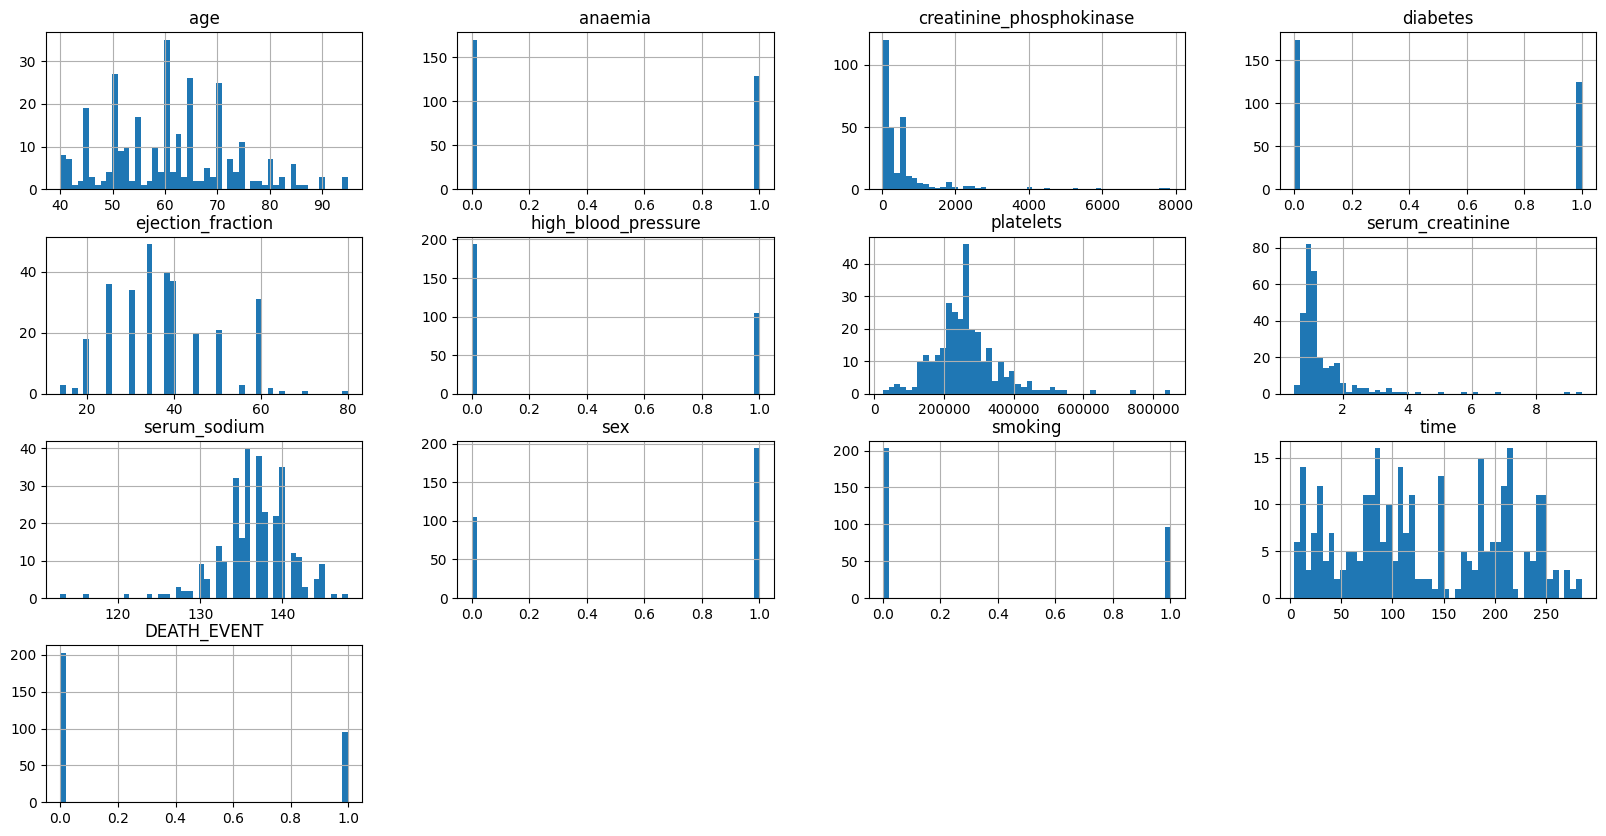

In [23]:
# Verificando o histograma de cada coluna
base_dados.hist(figsize=(20,10),bins=50);

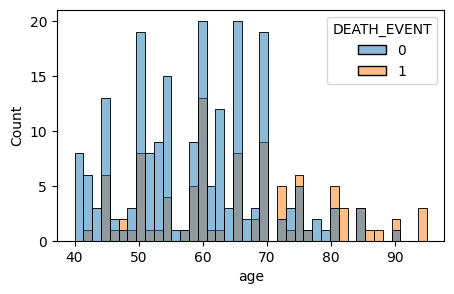

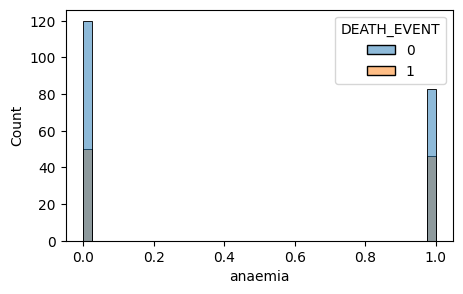

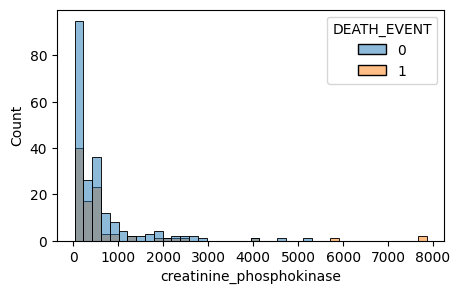

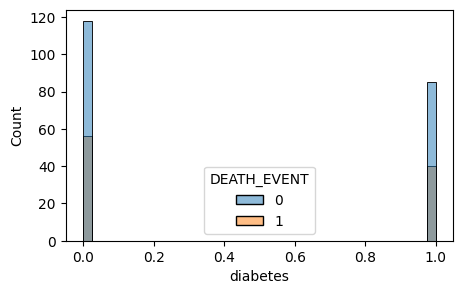

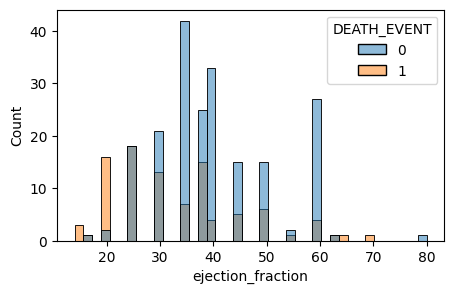

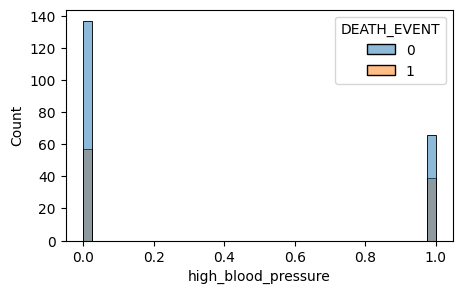

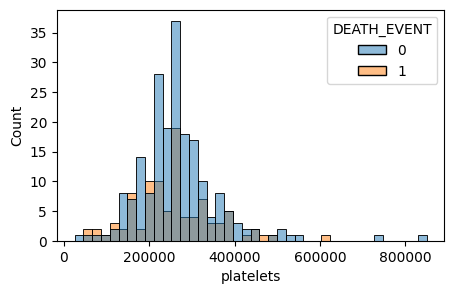

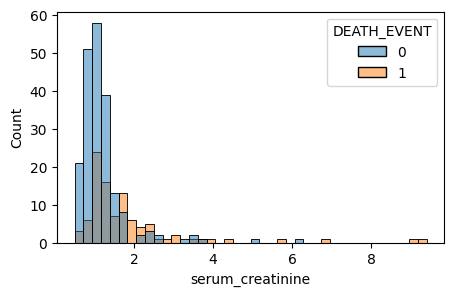

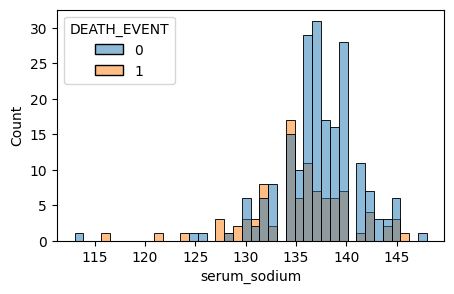

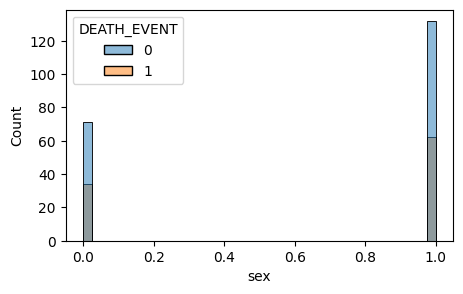

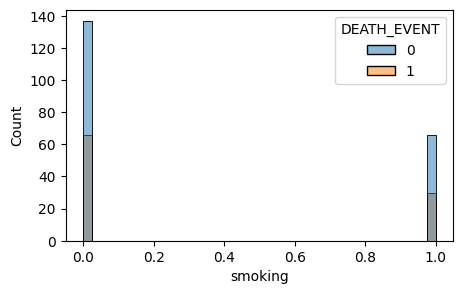

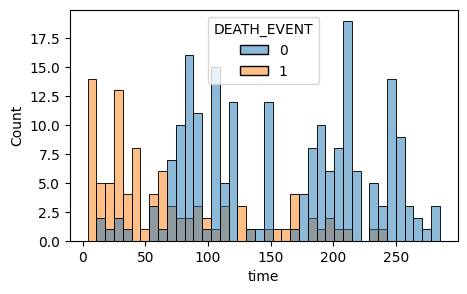

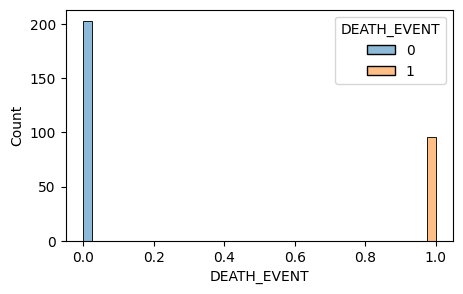

In [27]:
# Histograma em relação com relação DEATH_EVENT
for i in base_dados.columns:
  plt.figure(figsize=(5,3 ))
  sns.histplot(base_dados, x=i, hue="DEATH_EVENT",bins=40)
  plt.show()

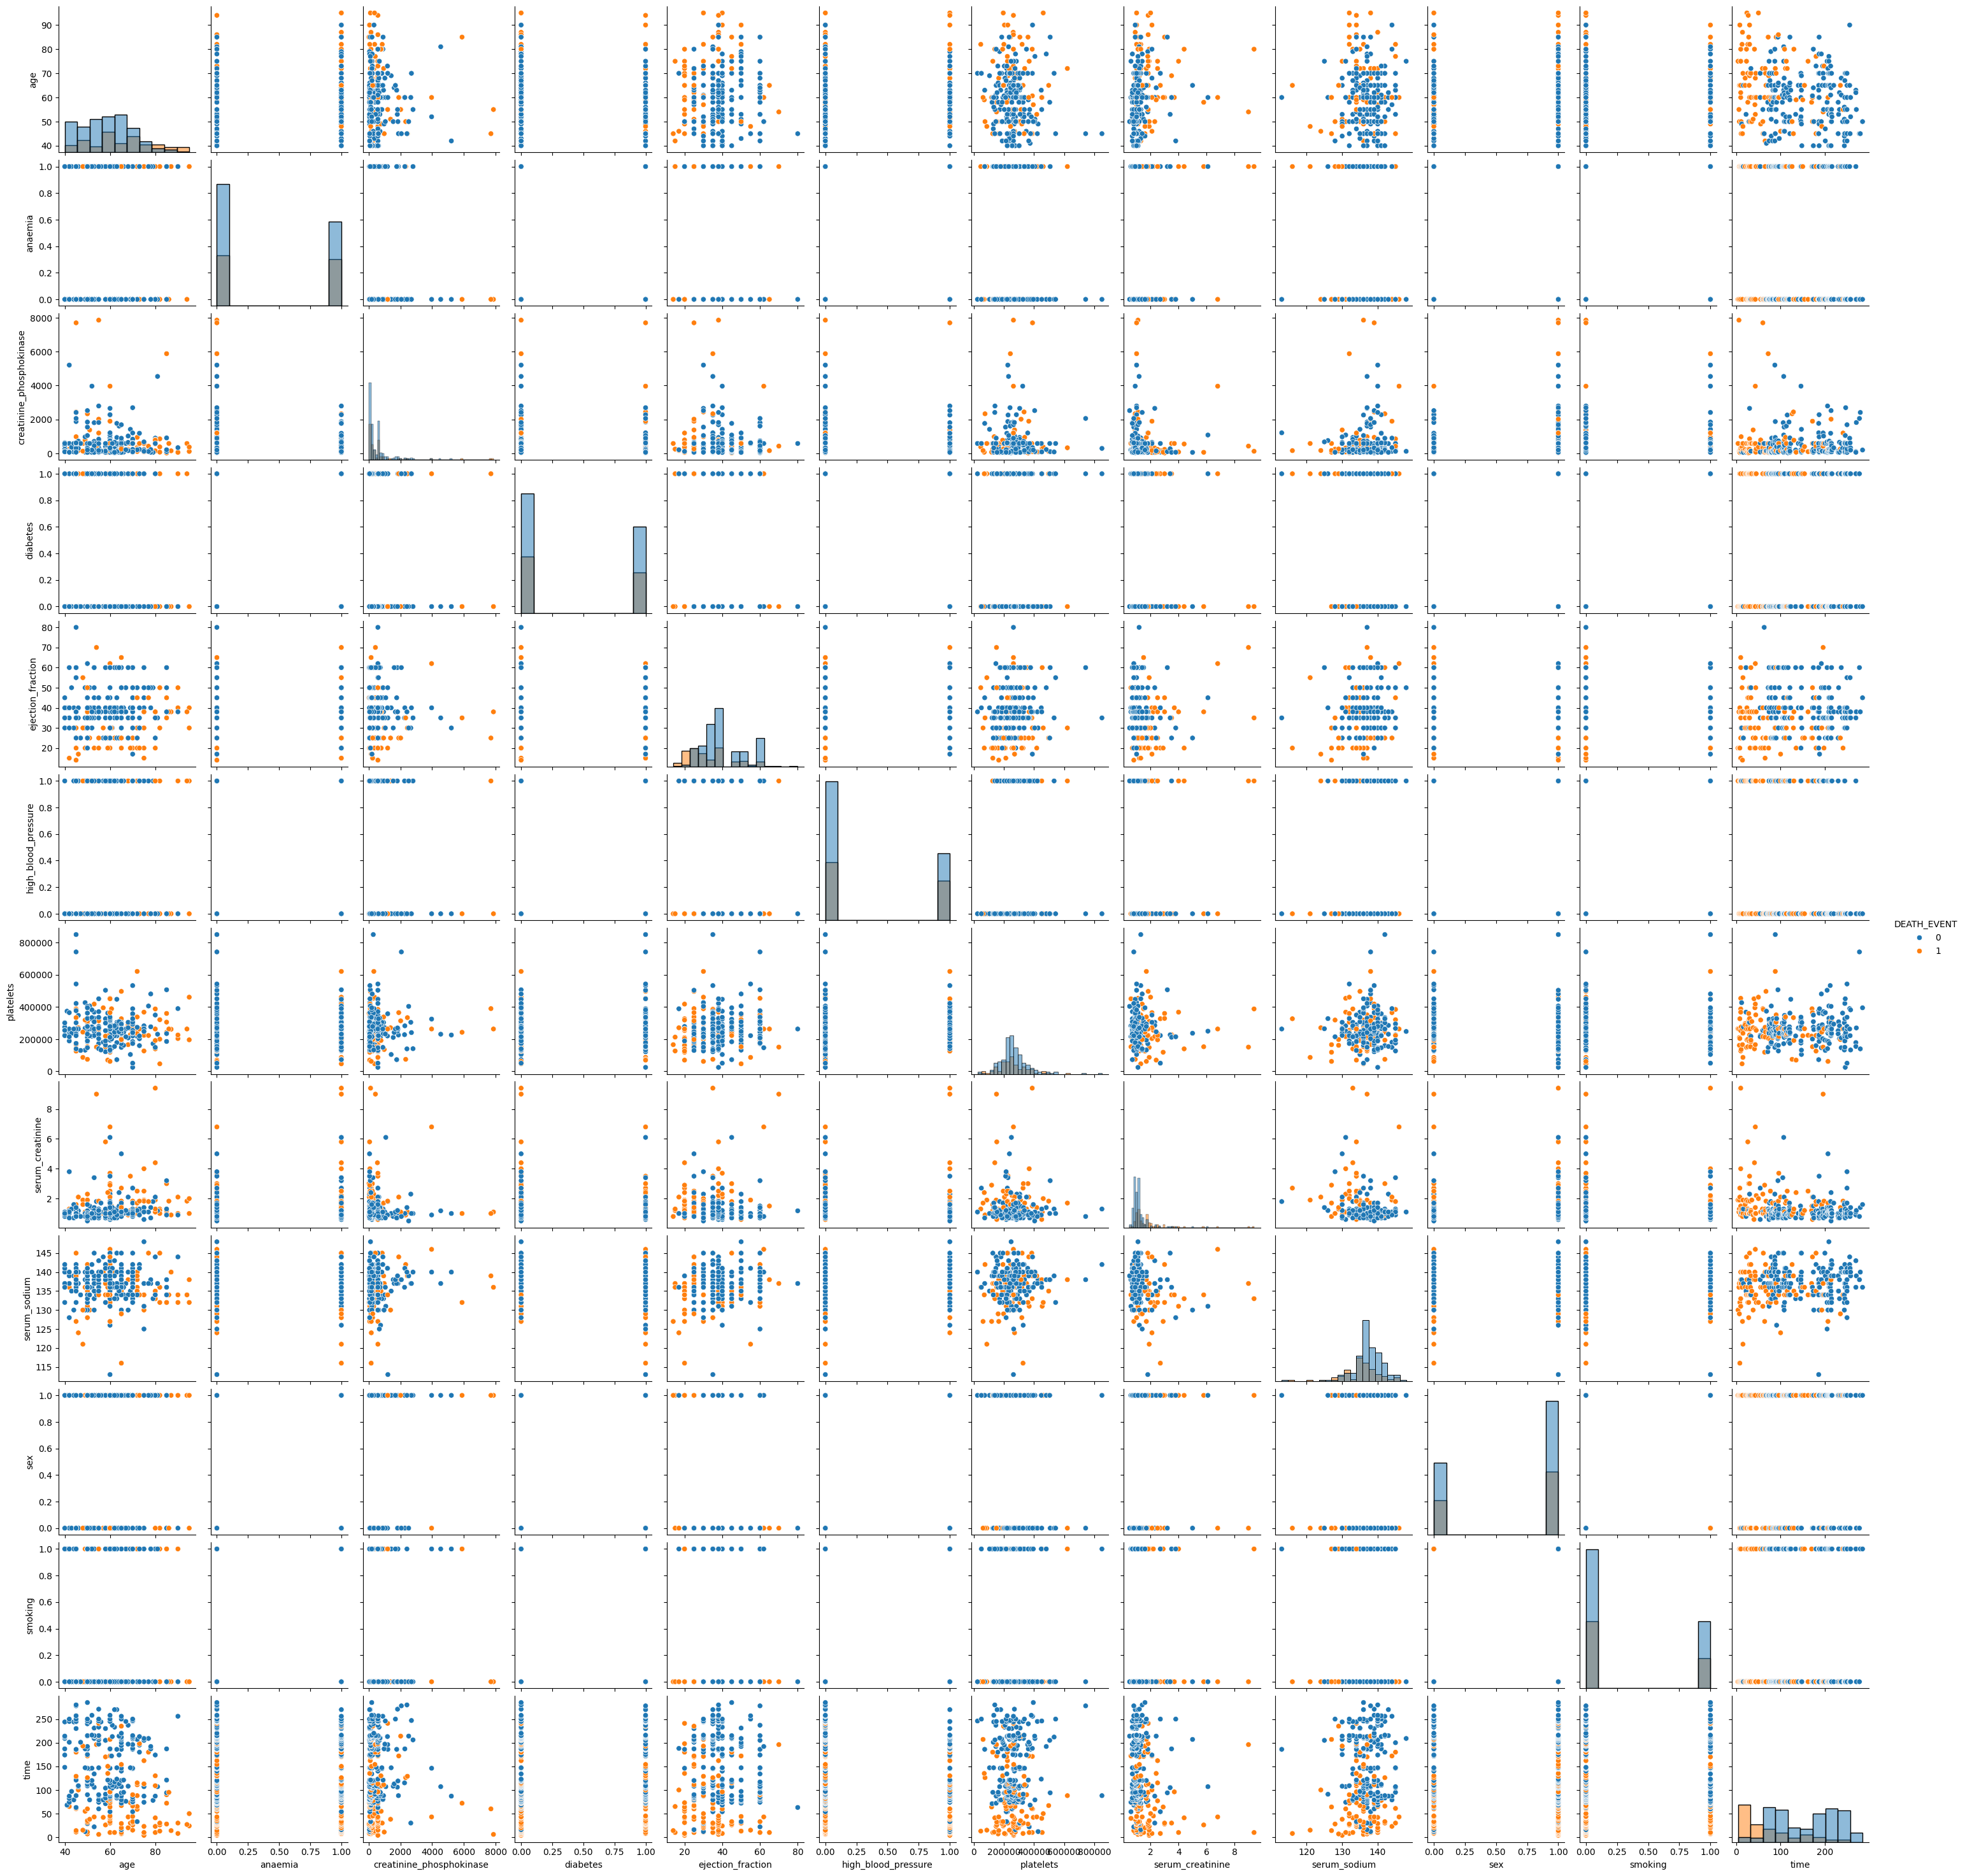

In [28]:
# Verificando como os dados se comportam.
sns.pairplot(base_dados, hue="DEATH_EVENT", diag_kind="hist")

# PREPARAÇÃO DO MODELO

In [54]:
# Importanto bibliotecas para modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

In [55]:
# Separando base de treino e teste

x_feature = base_dados.drop('DEATH_EVENT', axis=1).values
y_class = base_dados['DEATH_EVENT'].values

# Separando os dados de treino e Teste
x_feature_train, x_feature_test, y_class_train, y_class_test = train_test_split(x_feature , y_class , test_size = 0.30 , random_state = 42, stratify=y_class)

print(x_feature_train.shape)
print(y_class_train.shape)

print("--"*20)

print(x_feature_test.shape)
print(y_class_test.shape)

(239, 12)
(239,)
----------------------------------------
(60, 12)
(60,)


#Logistic Regression

In [68]:
# Iniciando modelo de regressão logística
from sklearn.linear_model import LogisticRegression

# Criar o modelo de regressão logística
logistic_regression = LogisticRegression(max_iter=1000)

# Treinar o modelo com os dados de treino
logistic_regression.fit(x_feature_train, y_class_train)

# Fazer previsões nos dados de teste
predict = logistic_regression.predict(x_feature_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_class_test, predict)
print(f"Acurácia do modelo de regressão logística: {accuracy:.2f}")

Acurácia do modelo de regressão logística: 0.85


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



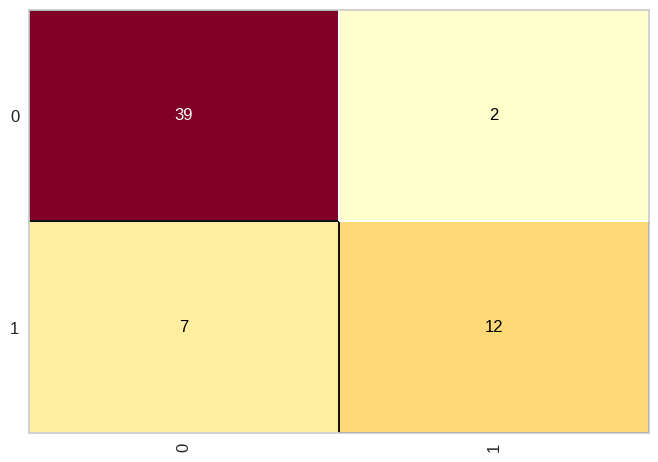

In [57]:
# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(logistic_regression)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = logistic_regression.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [58]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(logistic_regression, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.83
Fold 2: 0.75
Fold 3: 0.80
Fold 4: 0.85
Fold 5: 0.86
----------------------------------------
Média das Pontuações: 0.82
----------------------------------------


#Redes Neurais Artificiais (ANN)

In [59]:
# Iniciando modelo de ANN
from sklearn.neural_network import MLPClassifier

# Criar o modelo de classificação com rede neural
ANN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500, random_state=42)

# Treinar o modelo
ANN.fit(x_feature_train, y_class_train)

# Fazer previsões
predictions = ANN.predict(x_feature_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_class_test, predictions)
print("Acurácia do modelo de classificação:", accuracy)

Acurácia do modelo de classificação: 0.6833333333333333


#SVM (Support Vector Machine)

In [61]:
# Iniciando modelo SVM
from sklearn.svm import SVC

SVM = SVC(kernel='linear')

# Treinando o modelo
SVM.fit(x_feature_train, y_class_train)

# Fazendo previsões no conjunto de teste
predictions = SVM.predict(x_feature_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_class_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7666666666666667


              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



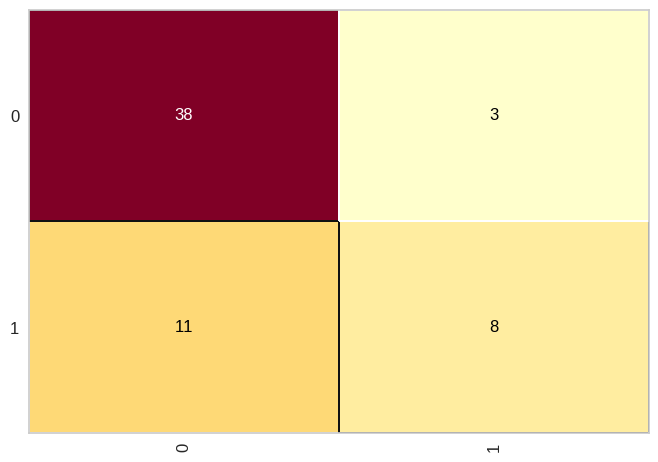

In [62]:
# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(SVM)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = SVM.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [63]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(SVM, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.82
Fold 2: 0.73
Fold 3: 0.77
Fold 4: 0.80
Fold 5: 0.83
----------------------------------------
Média das Pontuações: 0.79
----------------------------------------


#Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando o modelo de Árvore de Decisão

DTC = DecisionTreeClassifier()

# Treinando o modelo
DTC.fit(x_feature_train, y_class_train)

# Fazendo previsões no conjunto de teste
predictions = DTC.predict(x_feature_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_class_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.53      0.53      0.53        19

    accuracy                           0.70        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.70      0.70      0.70        60



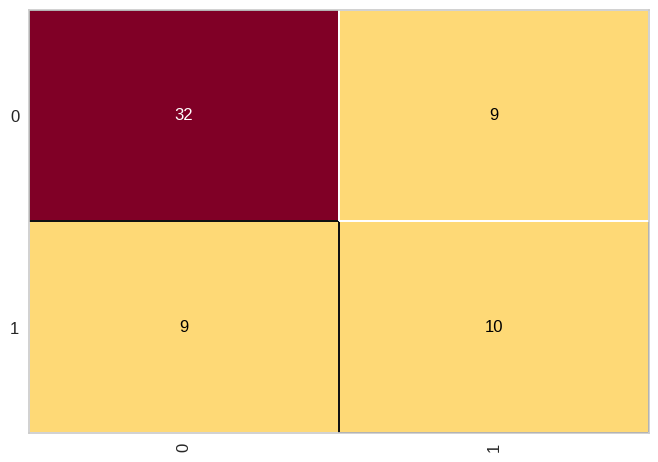

In [65]:
# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(DTC)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = DTC.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [66]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(DTC, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.85
Fold 2: 0.75
Fold 3: 0.80
Fold 4: 0.77
Fold 5: 0.78
----------------------------------------
Média das Pontuações: 0.79
----------------------------------------
